<a href="https://colab.research.google.com/github/rbsohee/-2-1/blob/master/kubme_ai_2%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%EA%B7%B8%EB%9E%98%ED%94%842.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [0]:
num_data = 1000
num_epoch = 10000

In [0]:
noise = init.normal_(torch.FloatTensor(num_data,1), std=3)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)

In [0]:
y = x**2 + x
y_noise = y + noise

In [0]:
model = nn.Sequential(
    nn.Linear(1,5),
    nn.ReLU(),
    nn.Linear(5,8),
    nn.ReLU(),
    nn.Linear(8,8),
    nn.ReLU(),
    nn.Linear(8,5),
    nn.ReLU(),   
    nn.Linear(5,1)
)

In [0]:
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0005)

In [0]:
loss_array = []
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)
  loss = loss_func(output, y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss)

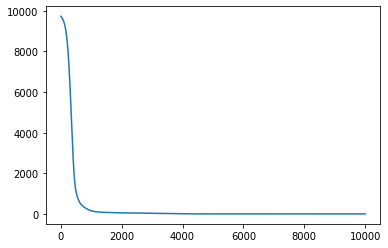

In [16]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

In [0]:
num_data = 1000

test_x = init.uniform_(torch.Tensor(num_data, 1), -15,15)
test_y = model(test_x)

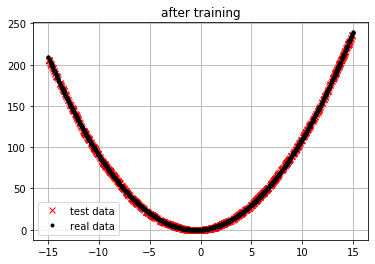

In [18]:
plt.plot(test_x.data, test_y.data, 'rx')
plt.plot(x.data, y.data, 'k.')
plt.legend(['test data', 'real data'])
plt.title('after training')
plt.grid(True)
plt.show()